In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('datasets/boston_data.csv', index_col=0)

In [9]:
data.head()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [10]:
data.shape

(333, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   indus    333 non-null    float64
 1   chas     333 non-null    int64  
 2   nox      333 non-null    float64
 3   rm       333 non-null    float64
 4   age      333 non-null    float64
 5   dis      333 non-null    float64
 6   rad      333 non-null    int64  
 7   tax      333 non-null    int64  
 8   ptratio  333 non-null    float64
 9   lstat    333 non-null    float64
 10  medv     333 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.2 KB


C:\Users\BPanero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(10.049999999999997, 0.5, '$')

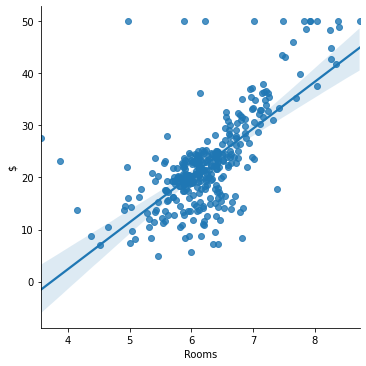

In [13]:
sns.lmplot('rm','medv',data)
plt.xlabel("Rooms")
plt.ylabel("$")

C:\Users\BPanero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(10.049999999999997, 0.5, '$')

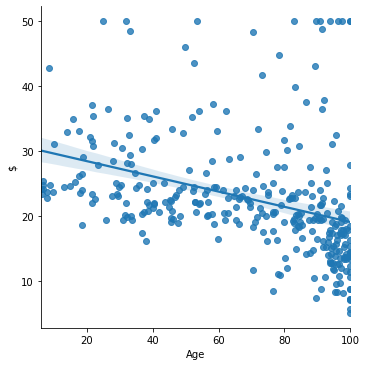

In [14]:
sns.lmplot('age','medv',data)
plt.xlabel("Age")
plt.ylabel("$")

C:\Users\BPanero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(10.049999999999997, 0.5, '$')

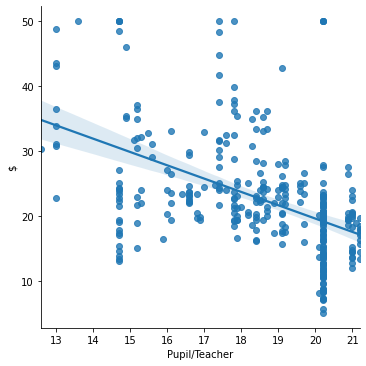

In [16]:
sns.lmplot('ptratio','medv',data)
plt.xlabel("Pupil/Teacher")
plt.ylabel("$")

In [23]:
#Importamos y tomamos el 80% como entrenamiento y el 20% como test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data.drop('medv',axis=1)
Y=data['medv']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
x_test.shape,y_test.shape

((67, 10), (67,))

In [25]:
#Creamos el modelo con los datos de train
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [26]:
#Creamos predicciones sobre las X de test para medir efectividad del modelo
y_pred=linear_regression.predict(x_test)
y_pred

array([25.28659457, 28.57303764, 15.80275488, 12.97116825, 22.44697113,
       25.84170951, 27.20057539, 18.91085253, 26.19709511, 20.28276254,
       17.05969415, 25.26024706, 30.80682063, 37.12729863, 15.21833837,
       33.18291063, 22.39997261, 25.74162379, 25.0195504 , 23.98978558,
       19.38274011, 19.46275505, 19.28853185,  5.01746847, 15.82210828,
       22.75937428, 26.96913154, 38.0985833 , 24.05918381, 25.00816864,
       13.63516153, 34.8525424 , 35.85423056, 20.97640409, 23.95028738,
       12.39041715, 24.7975901 ,  7.0509203 , 20.81358851, 27.3221854 ,
       20.62258606, 26.08272627, 26.35831448, 20.23324227, 21.32142227,
       29.04746247, 26.02230689, 29.28581985, 22.02729511, 16.98962646,
       38.41999055, 23.37075991, 22.82358094, 17.87904935, 26.59608259,
       21.86379968, 15.70849358, 17.85231653, 30.24900233, 28.29020911,
       31.41839805, 43.12399696, 23.28794298, 17.72371626, 15.27274181,
       25.61612834, 25.90338823])

In [29]:
#Comparamos la predicción contra los datos de test reales
df_y=pd.DataFrame({"yTest":y_test,"yPred":y_pred})
df_y.sample(10)

,yTest,yPred
ID,,
190,34.9,33.182911
74,23.4,25.841710
329,19.3,22.399973
150,15.4,12.971168
45,21.2,24.059184
28,14.8,15.272742
82,23.9,26.969132
179,29.9,31.418398
177,23.2,25.741624


In [31]:
##Score calculado
print("Training Score", linear_regression.score(x_train,y_train))

Training Score 0.7165238743004549


In [32]:
##Score calculado por R2
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("Testing score", score)

Testing score 0.6940069129106292


In [34]:
#Análisis 
import numpy as npy
import statsmodels.api as sm

In [36]:
X=npy.array(X)
X[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.33  ],
       [  7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,   5.5605,
          5.    , 311.    ,  15.2   ,  12.43  ]])

In [39]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              685.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                   7.35e-211
Time:                        00:08:11   Log-Likelihood:                         -1021.8
No. Observations:                 333   AIC:                                      2064.
Df Residuals:                     323   BIC:                                      2102.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0099      0.080     -0.123      0.902      -0.168       0.148
x2             4.3339      1.252      3.461      0.001       1.871       6.797
x3             0.5935      4.395      0.135      0.893      -8.053       9.240
x4             6.2482      0.401     15.591      0.000       5.460       7.037
x5            -0.0157      0.018     -0.858      0.391      -0.052       0.020
x6            -0.6503      0.250     -2.597      0.010      -1.143      -0.158
x7             0.0869      0.080      1.092      0.276      -0.070       0.244
x8            -0.0066      0.005     -1.385      0.167      -0.016       0.003
x9            -0.2626      0.130     -2.024      0.044      -0.518      -0.007
x10           -0.5386      0.065     -8.321      0.000      -0.666      -0.411
==============================================================================
Omnibus:                      141.333   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.422
Skew:                           1.709   Prob(JB):                    3.37e-165
Kurtosis:                       9.551   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""